In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow_datasets as tfds

# Source Code

### Load Data

In [2]:
file_path = '~/aiffel/transformer_chatbot/data/ChatbotData.csv'

data = pd.read_csv(file_path)
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


### Data Preprocessing

- missing value

In [3]:
data.isna().sum()

Q        0
A        0
label    0
dtype: int64

- preprocessing

In [4]:
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()
    
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r"[^a-zA-Z가-힣0-9?.!,]+", " ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = sentence.strip()
    
    return sentence

In [5]:
def load_conversations():
    inputs = []
    outputs = []
    
    for i in range(len(data)):
        inputs.append(preprocess_sentence(data['Q'].values[i]))
        outputs.append(preprocess_sentence(data['A'].values[i]))
    
    return inputs, outputs

In [6]:
questions, answers = load_conversations()

print("질문 수 : {}".format(len(questions)))
print("답변 수 : {}".format(len(answers)))

질문 수 : 11823
답변 수 : 11823


In [7]:
for i in range(10):
    print(f"Q{i+1}.", questions[i])
    print(f"A{i+1}.", answers[i])
    print('-'*40)

Q1. 12시 땡 !
A1. 하루가 또 가네요 .
----------------------------------------
Q2. 1지망 학교 떨어졌어
A2. 위로해 드립니다 .
----------------------------------------
Q3. 3박4일 놀러가고 싶다
A3. 여행은 언제나 좋죠 .
----------------------------------------
Q4. 3박4일 정도 놀러가고 싶다
A4. 여행은 언제나 좋죠 .
----------------------------------------
Q5. ppl 심하네
A5. 눈살이 찌푸려지죠 .
----------------------------------------
Q6. sd카드 망가졌어
A6. 다시 새로 사는 게 마음 편해요 .
----------------------------------------
Q7. sd카드 안돼
A7. 다시 새로 사는 게 마음 편해요 .
----------------------------------------
Q8. sns 맞팔 왜 안하지
A8. 잘 모르고 있을 수도 있어요 .
----------------------------------------
Q9. sns 시간낭비인 거 아는데 매일 하는 중
A9. 시간을 정하고 해보세요 .
----------------------------------------
Q10. sns 시간낭비인데 자꾸 보게됨
A10. 시간을 정하고 해보세요 .
----------------------------------------


### SubwordTextEncoder

- tokenize

In [8]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, 
                                                                      target_vocab_size=2**13)

In [9]:
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

In [10]:
print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [8162]
END_TOKEN의 번호 : [8163]


In [11]:
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8164


In [12]:
for i in range(10):
    print(f"Q{i+1}.", tokenizer.encode(questions[i]))
    print(f"A{i+1}.", tokenizer.encode(answers[i]))
    print('-'*40)

Q1. [7901, 4198, 3050, 41]
A1. [3837, 74, 7880, 1]
----------------------------------------
Q2. [7955, 47, 916, 7938, 994, 1714]
A2. [1827, 5493, 1]
----------------------------------------
Q3. [7957, 1432, 4646, 7938, 3642, 67]
A3. [3390, 773, 130, 1]
----------------------------------------
Q4. [7957, 1432, 4646, 7938, 1291, 3642, 67]
A4. [3390, 773, 130, 1]
----------------------------------------
Q5. [8018, 8018, 8014, 7938, 4181]
A5. [981, 2296, 1491, 2180, 5461, 50, 1]
----------------------------------------
Q6. [8021, 8006, 2188, 916, 78, 817]
A6. [69, 2062, 455, 5, 137, 2184, 17, 1]
----------------------------------------
Q7. [8021, 8006, 2188, 201]
A7. [69, 2062, 455, 5, 137, 2184, 17, 1]
----------------------------------------
Q8. [1946, 644, 1125, 7938, 66, 5110]
A8. [14, 1890, 29, 71, 25, 1]
----------------------------------------
Q9. [1946, 778, 7598, 172, 8, 2562, 435, 48, 203]
A9. [349, 3977, 16, 32, 1]
----------------------------------------
Q10. [1946, 778, 7598, 

questions 최소길이 1
questions 최대길이 21
questions 평균길이 5.484986889960247
answers 최소길이 1
answers 최대길이 29
answers 평균길이 5.818404804195213


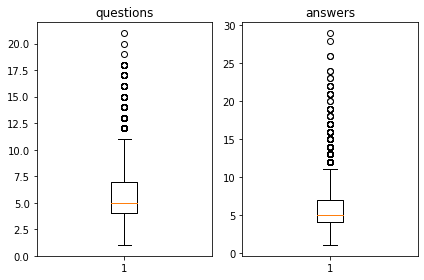

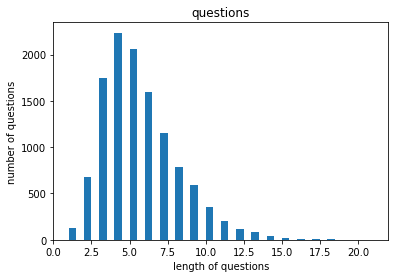

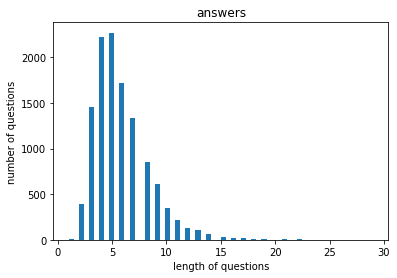

In [13]:
q_len = [len(tokenizer.encode(questions[i])) for i in range(len(questions))]
a_len = [len(tokenizer.encode(answers[i])) for i in range(len(answers))]

print("questions 최소길이", np.min(q_len))
print("questions 최대길이", np.max(q_len))
print("questions 평균길이", np.mean(q_len))
print("answers 최소길이", np.min(a_len))
print("answers 최대길이", np.max(a_len))
print("answers 평균길이", np.mean(a_len))

plt.subplot(1, 2, 1)
plt.boxplot(q_len)
plt.title('questions')
plt.subplot(1, 2, 2)
plt.boxplot(a_len)
plt.title('answers')
plt.tight_layout()
plt.show()

plt.title('questions')
plt.hist(q_len, bins = 40)
plt.xlabel('length of questions')
plt.ylabel('number of questions')
plt.show()

plt.title('answers')
plt.hist(a_len, bins = 60)
plt.xlabel('length of questions')
plt.ylabel('number of questions')
plt.show()

- word embedding & padding

In [14]:
MAX_LENGTH = 15

In [15]:
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []
    
    for (sentence1, sentence2) in zip(inputs, outputs):
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN
        
        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)
    
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
                        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
                        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
    
    return tokenized_inputs, tokenized_outputs

In [16]:
questions, answers = tokenize_and_filter(questions, answers)

print('단어장 크기:', VOCAB_SIZE)
print('필터링 후 questions 개수:', len(questions))
print('필터링 후 answers 개수:', len(answers))

단어장 크기: 8164
필터링 후 questions 개수: 11571
필터링 후 answers 개수: 11571


- build tf.dataset

In [17]:
BATCH_SIZE = 64
BUFFER_SIZE = 12000

dataset = tf.data.Dataset.from_tensor_slices((
            {
                'inputs': questions,
                'dec_inputs': answers[:, :-1]
            },
            {
                'outputs': answers[:, 1:]
            }
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

### Modeling

- PositionalEncoding

In [18]:
class PositionalEncoding(tf.keras.layers.Layer):
    
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)
        
    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles
    
    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(
            position = tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i = tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)
        
        sines = tf.math.sin(angle_rads[:, 0::2])
        cosines = tf.math.cos(angle_rads[:, 1::2])
        
        pos_encoding = tf.stack([sines, cosines], axis=0)
        pos_encoding = tf.transpose(pos_encoding, [1, 2, 0])
        pos_encoding = tf.reshape(pos_encoding, [position, d_model])
        
        pos_encoding = pos_encoding[tf.newaxis, ...]
        
        return tf.cast(pos_encoding, tf.float32)
    
    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

- Attention

In [19]:
def scaled_dot_product_attention(query, key, value, mask):
    matmul_qk = tf.matmul(query, key, transpose_b=True)
    
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)
    
    if mask is not None:
        logits += (mask * -1e9)
        
    attention_weights = tf.nn.softmax(logits, axis=-1)
    
    output = tf.matmul(attention_weights, value)
    
    return output

In [20]:
class MultiHeadAttention(tf.keras.layers.Layer):
    
    def __init__(self, d_model, num_heads, name='multi_head_attention'):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model
        
        assert d_model % self.num_heads == 0
        
        self.depth = d_model // self.num_heads
        
        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)
        
        self.dense = tf.keras.layers.Dense(units=d_model)
        
    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])
    
    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs['value'], inputs['mask']
        batch_size = tf.shape(query)[0]
        
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)
        
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)
        
        scaled_attention = scaled_dot_product_attention(query, key, value, mask)
        
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        
        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model))
        
        outputs = self.dense(concat_attention)
        
        return outputs

- padding_masking

In [21]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    
    return mask[:, tf.newaxis, tf.newaxis, :]

- look-ahead_masking + padding_masking

In [22]:
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)
    
    return tf.maximum(look_ahead_mask, padding_mask)

- encoder

In [23]:
def encoder_layer(units, d_model, num_heads, dropout, name='encoder_layer'):
    inputs = tf.keras.Input(shape=(None, d_model), name='inputs')
    
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
    
    attention = MultiHeadAttention(
                d_model, num_heads, name='attention')({
                'query': inputs,
                'key': inputs,
                'value': inputs,
                'mask': padding_mask
    })
    
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(
                epsilon=1e-6)(inputs + attention)
    
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)
    
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
                epsilon=1e-6)(attention + outputs)
    
    return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [24]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='encoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
    
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)
    
    for i in range(num_layers):
        outputs = encoder_layer(
                    units=units,
                    d_model=d_model,
                    num_heads=num_heads,
                    dropout=dropout,
                    name='encoder_layer_{}'.format(i))([outputs, padding_mask])
        
    return tf.keras.Model(
            inputs=[inputs, padding_mask], outputs=outputs, name=name)

- decoder

In [25]:
def decoder_layer(units, d_model, num_heads, dropout, name='decoder_layer'):
    inputs = tf.keras.Input(shape=(None, d_model), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
    
    attention1 = MultiHeadAttention(
                    d_model, num_heads, name='attention_1')(inputs={
                        'query': inputs,
                        'key': inputs,
                        'value': inputs,
                        'mask': look_ahead_mask
                    })
    
    attention1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention1 + inputs)
    
    attention2 = MultiHeadAttention(
                    d_model, num_heads, name='attention_2')(inputs={
                        'query': attention1,
                        'key': enc_outputs,
                        'value': enc_outputs,
                        'mask': padding_mask
                    })
    
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(
                epsilon=1e-6)(attention2 + attention1)
    
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)
    
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(outputs + attention2)
    
    return tf.keras.Model(
            inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
            outputs=outputs,
            name=name)

In [26]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name='look_ahead_mask')
    
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
    
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)
    
    for i in range(num_layers):
        outputs = decoder_layer(
                    units=units,
                    d_model=d_model,
                    num_heads=num_heads,
                    dropout=dropout,
                    name='decoder_layer_{}'.format(i))(
        inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])
        
    return tf.keras.Model(
            inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
            outputs=outputs,
            name=name)

- transformer

In [27]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    dec_inputs = tf.keras.Input(shape=(None,), name='dec_inputs')
    
    enc_padding_mask = tf.keras.layers.Lambda(
                        create_padding_mask, 
                        output_shape=(1, 1, None),
                        name='enc_padding_mask')(inputs)
    
    look_ahead_mask = tf.keras.layers.Lambda(
                        create_look_ahead_mask,
                        output_shape=(1, None, None),
                        name='look_ahead_mask')(dec_inputs)
    
    dec_padding_mask = tf.keras.layers.Lambda(
                        create_padding_mask, output_shape=(1, 1, None),
                        name='dec_padding_mask')(inputs)
    
    # encoder
    enc_outputs = encoder(
                  vocab_size=vocab_size,
                  num_layers=num_layers,
                  units=units,
                  d_model=d_model,
                  num_heads=num_heads,
                  dropout=dropout
                )(inputs=[inputs, enc_padding_mask])
    
    # decoder
    dec_outputs = decoder(
                  vocab_size=vocab_size,
                  num_layers=num_layers,
                  units=units,
                  d_model=d_model,
                  num_heads=num_heads,
                  dropout=dropout
                )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])
    
    # fc layer
    outputs = tf.keras.layers.Dense(units=vocab_size, name='outputs')(dec_outputs)
    
    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

In [28]:
tf.keras.backend.clear_session()

NUM_LAYERS = 4
D_MODEL = 256
NUM_HEADS = 8
UNITS = 512
DROPOUT = 0.1

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    4198400     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

- loss function

In [29]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
            from_logits=True, reduction='none')(y_true, y_pred)
    
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

- Custom Learning Rate Scheduling

In [30]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

- compile

In [31]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
            learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

### Training

In [32]:
EPOCHS = 50
history = model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/50
181/181 [==============================] - 29s 52ms/step - loss: 3.9148 - accuracy: 0.0639
Epoch 2/50
181/181 [==============================] - 9s 52ms/step - loss: 3.2077 - accuracy: 0.1322
Epoch 3/50
181/181 [==============================] - 9s 52ms/step - loss: 2.7301 - accuracy: 0.1402
Epoch 4/50
181/181 [==============================] - 9s 52ms/step - loss: 2.5354 - accuracy: 0.1487
Epoch 5/50
181/181 [==============================] - 9s 52ms/step - loss: 2.4065 - accuracy: 0.1562
Epoch 6/50
181/181 [==============================] - 9s 52ms/step - loss: 2.2847 - accuracy: 0.1623
Epoch 7/50
181/181 [==============================] - 9s 52ms/step - loss: 2.1464 - accuracy: 0.1725
Epoch 8/50
181/181 [==============================] - 9s 52ms/step - loss: 1.9883 - accuracy: 0.1858
Epoch 9/50
181/181 [==============================] - 9s 52ms/step - loss: 1.8162 - accuracy: 0.2030
Epoch 10/50
181/181 [==============================] - 10s 53ms/step - loss: 1.6271 - accu

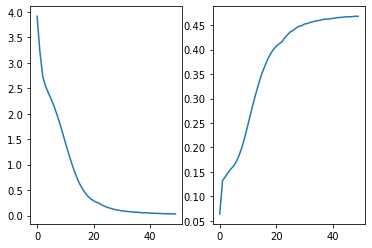

In [33]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')

- 총 50 EPOCH 를 학습시킨 그래프입니다.
<br>
<br>
- loss 가 안정적으로 줄어들고 있음을 확인할 수 있습니다.
<br>
<br>
- accuracy 또한 증가하고 있음을 알 수 있습니다.

### Evaluate

In [34]:
def decoder_inference(sentence):
    sentence = preprocess_sentence(sentence)
    
    sentence = tf.expand_dims(
                START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)
    
    output_sequence = tf.expand_dims(START_TOKEN, 0)
    
    # Inference
    for i in range(MAX_LENGTH):
        predictions = model(inputs=[sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]
        
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
        
        if tf.equal(predicted_id, END_TOKEN[0]):
            break
            
        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)
        
    return tf.squeeze(output_sequence, axis=0)

In [35]:
def sentence_generation(sentence):
    prediction = decoder_inference(sentence)
    
    predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

    print('입력 : {}'.format(sentence))
    print('출력 : {}'.format(predicted_sentence))

    return predicted_sentence

In [36]:
sentence_generation('안녕?')

입력 : 안녕?
출력 : 안녕하세요 .


'안녕하세요 .'

In [37]:
sentence_generation('안녕')

입력 : 안녕
출력 : 안녕하세요 .


'안녕하세요 .'

In [38]:
sentence_generation('밥 먹었어?')

입력 : 밥 먹었어?
출력 : 저는 배터리가 밥이예요 .


'저는 배터리가 밥이예요 .'

In [39]:
sentence_generation('심심해')

입력 : 심심해
출력 : 친구들과 연락해보세요 .


'친구들과 연락해보세요 .'

In [40]:
sentence_generation('뭐해?')

입력 : 뭐해?
출력 : 냉장고 파먹기 해보세요 .


'냉장고 파먹기 해보세요 .'

In [44]:
sentence_generation('너 이름이 뭐야?')

입력 : 너 이름이 뭐야?
출력 : 위로봇이요 .


'위로봇이요 .'

In [45]:
sentence_generation('뭐하고 있어?')

입력 : 뭐하고 있어?
출력 : 저랑 놀아요 .


'저랑 놀아요 .'

In [47]:
sentence_generation('지금 기분이 어때?')

입력 : 지금 기분이 어때?
출력 : 네 연락해보세요 .


'네 연락해보세요 .'

- 안정적으로 학습된 모델에 다양한 입력값을 넣어 출력을 확인해보았습니다.
<br>
<br>
- 인사말과 같은 기본적인 질문에는 정확한 답변을 얻을 수 있었습니다.
<br>
<br>
- 하지만, '뭐해?' '뭐하고 있어?' '지금 기분이 어때?' 와 같은 현재 상황에 대한 질문에는 정확한 답변을 얻을 수 없었습니다.
<br>
<br>
- 또한, '냉장고 파먹기' 와 같이 모델이 생성해내는 단어에는 일반적이지 않은 조합의 단어들도 확인되었습니다.

# Retrospection

<h2 style="font-style:italic">2022.02.18 - [E-12]Transformer_Chatbot_Project</h2>

> 이번 프로젝트에서는 Attention 을 기반으로 한 Transformer 모델을 활용하여 간단한 챗봇을 구현해보았습니다. 아래에서는 프로젝트를 진행하면서 어려웠던 점이나 알게된 점, 아직도 모호한 점들에 대해서 회고해보도록 하겠습니다.
***

**어려웠던 점**
<br>
<br>
- 프로젝트를 진행하면서 가장 어려웠던 점은 Transformer 모델의 구조와 원리에 관한 이해였습니다. 여타 RNN 이나 LSTM 의 Layer 들과는 다르게, Attention Layer 만으로 문장을 생성해낸다는 점이 직관적으로 이해하기에 쉽지 않았던 것 같습니다.
<br>
<br>
- Attention Layer 만을 활용하여 학습하기 때문에 문장 내 토큰들을 순서대로 입력받지 않고, 한 번에 입력받는 Input 에 대한 개념도 어렵게 느껴졌습니다. 하지만 이후, Positional Encoding 을 통해 위치 정보를 더해주는 작업을 이해하고 나서는 납득이 되었습니다.
<br>
<br>
- 세 개의 Attention Layer 중, Decoder 의 Self-Attention Layer 가 왜 필요한지에 대해 의문을 가지게 되었습니다. 물론, Encoder 의 Self-Attention 이 입력된 문장들의 단어 간 유사도를 측정하여 문맥 정보를 반영하기 위해서 사용되는 것과 같은 맥락으로 Decoder 또한 생성해낸 단어들 간 유사도를 측정하기 위함이라는 것에 대해서는 이해하였습니다. 다만, Decoder 가 생성해낸 문장의 문맥 정보를 파악하기 위해 Attention Layer 를 가지게 되는 것이라면, Encoder-Decoder-Attention Layer 만으로 충분히 자연스러운 문장을 생성해낼 수 있지 않을까라는 생각이 들었습니다.

**알게된 점**
<br>
<br>
- RNN 에서 LSTM 으로, Attention 에서 Transformer 로 진화해오던 각각의 과정들을 이해할 수 있게 되었습니다. 장기의존성 문제를 해결하기 위해 LSTM 이 제안되고, LSTM 에서 더 나은 성능을 위해 문맥 정보를 반영할 수 있는 Attention이 추가되었으며 이제 Attention 만을 활용해서도 더 나은 성능의 자연어 처리 모델을 구현해낼 수 있는 Transformer 까지, 전체적인 과정에 대해 알 수 있게 되었습니다.
<br>
<br>
- Encoder 와 Decoder 의 마스킹 기법에 대해 알게 되었습니다. Decoder 에서는 Encoder 와 다르게, 생성해내는 각 토큰들이 이후의 토큰과의 문맥 정보를 반영하여 결정된다면 이는 일종의 '치팅' 으로 학습될 수 있기 때문에 이후 토큰들에 대한 문맥 정보를 마스킹해준다는 것에 대해 이해하였습니다. 따라서, Encoder 에서는 무의미한 정보인 pad 에 대해서만 마스킹하고, Decoder 에서는 Look-Ahead-Masking 을 통해 미래의 토큰들에 대해 마스킹해주는 것입니다.
<br>
<br>
- 추가적으로, Positional Encoding 에서 각 문장 내 단어들의 위치 정보를 부여하는 과정을 보면 sin 및 cosine 함수를 사용하는 모습을 확인할 수 있었습니다. 프로젝트 진행 중 이 부분에 대해서 의문이 있었는데, 논문을 확인해보면 이는 sin 함수 그래프와 cosine 함수 그래프의 주기성을 활용하여 문장의 순서 정보를 함께 학습할 수 있도록 하기 위해서라는 말이 있었습니다. 또한, 주기성을 가지는 그래프라면 sin 혹은 cosine 함수를 사용하지 않아도 가능하고 실제로 다른 주기성을 가지는 그래프를 활용하여 학습시켜본 결과, sin 과 cosine 함수를 사용하였을 때와 유의미한 성능 차이가 발생하지 않았다고 합니다. 따라서, 주기성을 가지는 다른 함수들을 사용하여도 가능하다고 합니다.

**모호한 점**
<br>
<br>
- 앞서 언급했었던 Decoder 의 Self-Attention Layer 의 필요성에 대해 아직 의문이 남아있습니다. 이는 Decoder 에서의 Self-Attention Layer 의 역할에 대해 아직 정확하게 이해하지 못하였기 때문에 의문이 풀리지 않은 것이라고 생각합니다. 이에 대한 추가적인 학습이 필요할 것 같습니다.
<br>
<br>
- 각 Attention Layer 에서 Query 와 Key 를 곱한 뒤, Normalize 하고 이를 Softmax 에 넣어 logit 에서 Attention 값으로 변환해주는 과정에 대해서는 이해할 수 있었습니다. 다만, 이러한 값을 왜 Value 값과 곱해주는지에 대해 의문이 남아있습니다. 현재로서는 Softmax 를 통해 도출된 확률값을 문장에 곱해줌으로서, 영향력을 가지는 단어들에 대해서 가중치를 부여하기 위해서라는 생각이 들었습니다. 하지만, 아직 정확하지 않아 Attention Layer 에 대한 추가적인 학습이 필요할 것으로 사료됩니다.
<br>
<br>
- 또한, Attention 을 수행할 때, Multi Head 를 사용하는 이유에 대해서 그 원리가 잘 이해되지 않는 것 같습니다. Multi Head 를 사용할 경우, 문장의 각각 서로 다른 부분에서 각 영향력과 유사도를 확인할 수 있기 때문에 나중에 이를 합쳐주어 더 나은 성능을 기대할 수 있는 것으로 알고 있습니다. 하지만, 문장의 서로 다른 부분에서 다른 관점으로 영향력을 계산하는 과정이 직관적으로 이해될 뿐, 그것이 실제로 가능한 이유에 대해서 궁금증이 해소되지 않았습니다.